# CAP5619-24Spring 0V61 - Group 4 - Final Project

## Introduction

This research project focuses on risk governance. More particularly, it identifies and assesses a substantial risk that enterprises are often unaware of: Sales and Use Tax law compliance. Yet, non-compliance with sales and use tax laws and regulations can have dire impact on enterprise functioning and even survival. It is a risk too severe for enterprises to ignore. Our research aims at providing a tool for enterprises to identify, monitor, and mitigate such areas of risk.

## Definition of the Problem

For entrepreneurs and businesses, compliance with government regulations is often an after-thought if a thought at all. They focus on development and production, acquisition and cashflow, marketing and sales, and so forth. That is until the government knocks at their door. In Florida, one government agency that consistently knocks on business doors is the Florida Department of Revenue (DOR), to ensure sales and use tax compliance. With its interagency state and federal data match, its state-of-the-art lead programs, and the sharpness of its auditors, DOR sales and use tax audit is mostly certain to discover non-compliance. In the other side of the diptych, businesses are too often unaware of the variety of third-party data the department have access to and collect through nightly interagency digital data interface. Then, they grow dismayed. The terror starts with the Notice of Intent to Audit Books and Records. Less than a year later, the business receives the Notice of Proposed Assessment which conveys one important message: noncompliance is costly. This research project offers the opportunity to businesses to predict and by that to avoid or mitigate the risk of an audit. Using machine learning, the algorithm predicts the risk of a sales and use tax audit. It puts the power in the hands of businesses. By power, we mean compliance and the avoidance of costly mistakes that cause the business to incur not only additional tax due, but hefty penalties and interests, legal and professional fees, not to mention criminal investigations and proceedings. In extreme cases, an audit means the closure of the business, especially for small businesses.

## Scope of the Project

What we are dealing with is a simple classification problem: Compliance versus noncompliance, audit risk high versus low. Even with its simplicity, our proposed algorithm is mighty. Its value expands way beyond a yes or no prediction. It can prevent businesses from the nightmarish scenario of a sales and use tax audit. It can also become a tool in the hands of sales tax professionals, CPA, auditors, and attorneys involved in the auditing process on the clientele side. It allows them to build audit prevention infrastructures as well as defense strategies for their clients.

### I. Algorithms and Performance Metrics

The Florida Department of Revenue does not publish data relating to its auditing activities. Fortunately, through our research and consulting with industry insiders, we recovered the department lead algorithm. From there, we generate a simulated audit risk dataset. The dataset consists of the result of 100160 sales and use tax audits performed on numerous sectors and industries. Our main data source is the North American Industry Classification System (NAICS). Per the United States Census Bureau, the North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy.

To construct the dataset, we use the exempt/taxable ratio industry averages from NAICS. The data comprise multiple features, the most relevant are: • NAICS Code • NAICS Description • Exempt Sales Total • Taxable Sales Tot • Gross Sales Total • Taxable Ratio

The Florida Department of Revenue used industry averages from NAICS to construct its audit lead program. Using the same criteria used by the department to generate the leads, we engineered the Audit Risk dataset with the following features: Taxable Ratio, NAICS Code, Gross Sales Total, NAICS Description, and Gross Income, Tax Paid, Tax Due, and Additional Tax Due. The result of the audit is the class “Audit Risk” which classified the audit risk as High (1) or Low (0).

We will train our model using machine learning algorithms for classification. We will use several performance metrics, including accuracy, F1 score, precision, and recall, to evaluate our model. 

### II. Python Libraries

To execute our project, we use python libraries such as pandas and NumPy for data manipulation and analysis, matplotlib for visualization, and sklearn for machine learning, testing, evaluation. We imported the exhaustive list of the necessary libraries below.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, StackingClassifier, VotingRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### III. The Dataset

Having all the necessary libraries in place, we can now load the audit risk dataset from memory. We use pandas to transform the csv data file into a data-frame. The data-frame consists of 8 features (columns) and one target variable which is the audit risk column.

In [39]:
# Import the Audit Risk dataset csv file from memory 
audit_risk = pd.read_csv(r'../data/Audit_Risk.csv')

### IV. Data Summary

The next few lines of codes provide an overview of the audit risk data-frame. The head provides a glimpse at the first 5 data rows, whereas the tail shows the last 5 rows. Method calls, including shape, info, and isnull confirm the dimension of dataset, 102920 rows and 9 columns. They reveal no missing or null values, and no anomaly.

In [40]:
# Here is a view of the dataset head and tail.
audit_risk

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,NAICS Description,Gross Income,Tax Due,Additional Tax Due,Audit Risk
0,0.000000,0.00000,111110,0.0,Soybean Farming,57881367,0.000000e+00,0.0000,0
1,0.000000,0.00000,111110,0.0,Soybean Farming,72944641,0.000000e+00,0.0000,0
2,0.000000,0.00000,111110,0.0,Soybean Farming,64883075,0.000000e+00,0.0000,0
3,0.000000,0.00000,111110,0.0,Soybean Farming,9491569,0.000000e+00,0.0000,0
4,0.000000,0.00000,111110,0.0,Soybean Farming,11691084,0.000000e+00,0.0000,0
...,...,...,...,...,...,...,...,...,...
102915,0.195654,195166.20690,999999,818781523.2,Unclassified Establishments,79167211,9.293629e+05,734196.6831,1
102916,0.195654,466309.96360,999999,818781523.2,Unclassified Establishments,57568594,6.758115e+05,209501.5778,1
102917,0.195654,45332.22453,999999,818781523.2,Unclassified Establishments,12871993,1.511074e+05,105775.1906,1
102918,0.195654,485247.95790,999999,818781523.2,Unclassified Establishments,86115732,1.010933e+06,525685.2878,1


In [41]:
# The dataset comprises 102920 rows with 9 columns: 8 features and 1 target 
# variable, which is the Audit Risk.
audit_risk.shape

(102920, 9)

In [42]:
# The dataset has no null or missing value
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102920 entries, 0 to 102919
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Taxable Ratio       102920 non-null  float64
 1   Tax Paid            102920 non-null  float64
 2   NAICS Code          102920 non-null  int64  
 3   Gross Sales Total   102920 non-null  float64
 4   NAICS Description   102920 non-null  object 
 5   Gross Income        102920 non-null  int64  
 6   Tax Due             102920 non-null  float64
 7   Additional Tax Due  102920 non-null  float64
 8   Audit Risk          102920 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB


In [43]:
# This confirms that the dataset has no null value
audit_risk.isnull().sum()

Taxable Ratio         0
Tax Paid              0
NAICS Code            0
Gross Sales Total     0
NAICS Description     0
Gross Income          0
Tax Due               0
Additional Tax Due    0
Audit Risk            0
dtype: int64

### V. Descriptive Statistics

The following sections provide summaries, frequency distribution, and visualization of the characteristics of our data-frame, using pandas descriptive statistics function “describe” and matplotlib. Furthermore, we use the Pearson correlation coefficient to measure the linear relationship between variables.

In [44]:
# Use the describe function to compute summary statistics, including mean, median, standard deviation, minimum, 
# maximum, and quartiles
audit_risk.describe()

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,Gross Income,Tax Due,Additional Tax Due,Audit Risk
count,102920.000000,1.029200e+05,102920.000000,1.029200e+05,1.029200e+05,1.029200e+05,1.029200e+05,102920.000000
mean,0.317142,5.207969e+05,434488.241353,1.341734e+09,5.007296e+07,9.533280e+05,4.325310e+05,0.816071
std,0.304342,8.105106e+05,170710.502280,9.314300e+09,2.886641e+07,1.188408e+06,7.247340e+05,0.387428
min,0.000000,0.000000e+00,111110.000000,0.000000e+00,1.041600e+04,0.000000e+00,-5.246596e+05,0.000000
25%,0.052305,2.519757e+04,325992.000000,7.079738e+06,2.508101e+07,8.294337e+04,8.301519e+03,1.000000
50%,0.220483,1.768894e+05,423830.000000,6.502526e+07,5.004543e+07,4.649794e+05,1.239368e+05,1.000000
75%,0.526504,6.557982e+05,532310.000000,4.347654e+08,7.511434e+07,1.377501e+06,5.351391e+05,1.000000
max,1.000000,6.357486e+06,999999.000000,2.830000e+11,9.999893e+07,5.995626e+06,5.882833e+06,1.000000


Text(0, 0.5, 'Frequency')

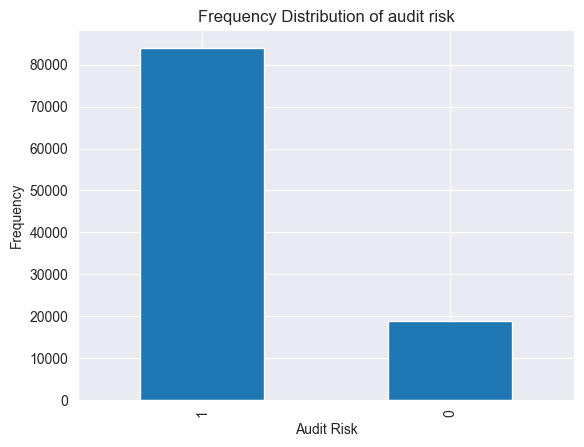

In [45]:
# Display frequency distribution of audit risk, using matplotlib
audit_risk['Audit Risk'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of audit risk')
plt.xlabel('Audit Risk')
plt.ylabel('Frequency')

In [46]:
# The Pearson correlation coefficient measures the linear relationship between two continuous variables
correlation_matrix = audit_risk.corr(numeric_only=True)
correlation_matrix

,Taxable Ratio,Tax Paid,NAICS Code,Gross Sales Total,Gross Income,Tax Due,Additional Tax Due,Audit Risk
Taxable Ratio,1.000000,0.618270,0.253641,0.005566,0.000976,0.769277,0.570004,0.237302
Tax Paid,0.618270,1.000000,0.158064,0.003356,0.367808,0.801482,0.195902,0.007500
NAICS Code,0.253641,0.158064,1.000000,0.019311,0.002637,0.196267,0.145064,0.057422
Gross Sales Total,0.005566,0.003356,0.019311,1.000000,-0.001145,0.005845,0.005832,0.015450
Gross Income,0.000976,0.367808,0.002637,-0.001145,1.000000,0.460871,0.344389,0.054718
Tax Due,0.769277,0.801482,0.196267,0.005845,0.460871,1.000000,0.743444,0.186589
Additional Tax Due,0.570004,0.195902,0.145064,0.005832,0.344389,0.743444,1.000000,0.297579
Audit Risk,0.237302,0.007500,0.057422,0.015450,0.054718,0.186589,0.297579,1.000000


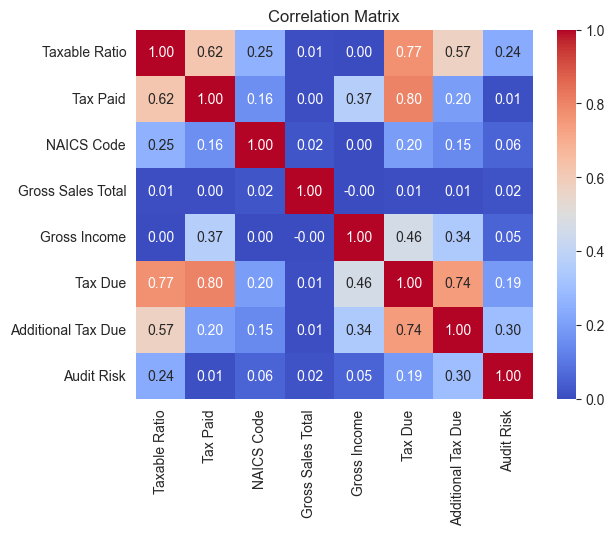

In [47]:
# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### VI. Data Visualizations

The plots below provide visualizations that allows to better conceptualize the data.

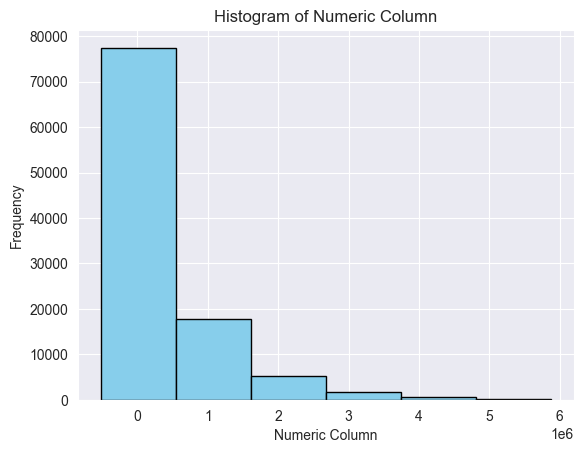

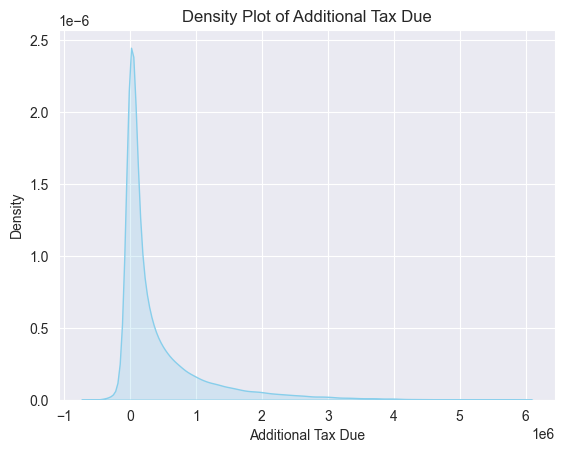

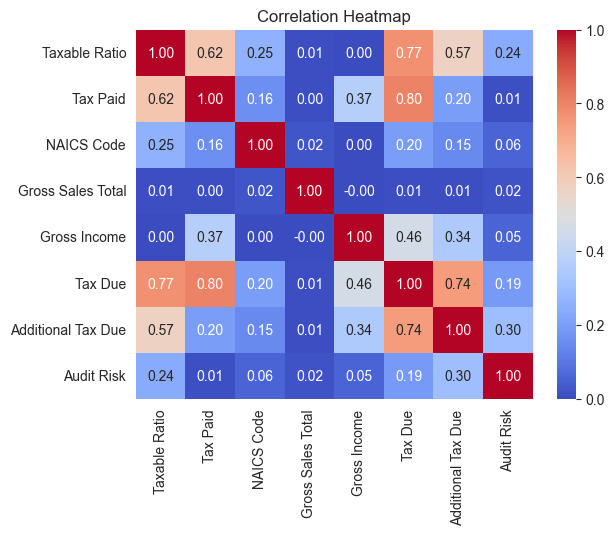

In [48]:
# Histogram
plt.hist(audit_risk['Additional Tax Due'], bins=6, color='skyblue', edgecolor='black')
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()

# Density Plot (Kernel Density Estimation)
sns.kdeplot(audit_risk['Additional Tax Due'], fill=True, color='skyblue')
plt.xlabel('Additional Tax Due')
plt.ylabel('Density')
plt.title('Density Plot of Additional Tax Due')
plt.show()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### VII.	Data preparation 

From our prior analysis, we are confident that the data is clean and suitable for analysis and modeling. There is no null or missing value.  No further cleaning, preprocessing and transformation is necessary. 

In [49]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102920 entries, 0 to 102919
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Taxable Ratio       102920 non-null  float64
 1   Tax Paid            102920 non-null  float64
 2   NAICS Code          102920 non-null  int64  
 3   Gross Sales Total   102920 non-null  float64
 4   NAICS Description   102920 non-null  object 
 5   Gross Income        102920 non-null  int64  
 6   Tax Due             102920 non-null  float64
 7   Additional Tax Due  102920 non-null  float64
 8   Audit Risk          102920 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB


### VIII. Data Cleaning 

We have already verified the cleanliness of the data-frame. There is no null
 or missing value, no outlier. However, to enhance the quality and the 
 usefulness of the data, we proceeded with scaling and transforming the 
 numerical feature, using the StandardScaler from the sklearn.preprocessing 
 library. 

In [50]:
# Get the numerical features as X
X = audit_risk[['NAICS Code', 'Gross Sales Total', 'Gross Income', 'Taxable Ratio', 'Tax Due',  'Tax Paid','Additional Tax Due']]
y = audit_risk['Audit Risk']

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_data

array([[-1.89431703, -0.14405163,  0.27050275, ..., -0.80219279,
        -0.64255725, -0.59681643],
       [-1.89431703, -0.14405163,  0.79233236, ..., -0.80219279,
        -0.64255725, -0.59681643],
       [-1.89431703, -0.14405163,  0.51305949, ..., -0.80219279,
        -0.64255725, -0.59681643],
       ...,
       [ 3.31270483, -0.05614535, -1.28873492, ..., -0.67504109,
        -0.58662653, -0.45086535],
       [ 3.31270483, -0.05614535,  1.24861201, ...,  0.04847286,
        -0.0438602 ,  0.12853642],
       [ 3.31270483, -0.05614535, -0.51787766, ..., -0.45523434,
        -0.37801941, -0.32372643]])

### IX. Feature Selection 

To identify the most important features from the dataset, we use the feature_importances method from pandas. Sorting the importance in ascending order, with can see that “Additional Tax Due” has the highest score: 1.0. So, “Additional Tax Due” is the most important feature in the dataset, which confirms our expectation. For further reinforcing the analysis, we use the feature_selection from sklearn.feature_selection. It returns “Additional Tax Due” as the most important feature. 

In [51]:
# Instantiate RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Additional Tax Due    1.0
NAICS Code            0.0
Gross Sales Total     0.0
Gross Income          0.0
Taxable Ratio         0.0
Tax Due               0.0
Tax Paid              0.0
dtype: float64

In [52]:
# Initialize feature_selection from sklearn.feature_selection ()
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)

# Fit RFE
selector = selector.fit(X, y)

# Get selected features
relevant_features = X.columns[selector.support_]
relevant_features

Index(['Additional Tax Due'], dtype='object')

### X. Data Transforms 

As demonstrated above, while the dataset has 8 features, the feature selection utility from sklearn selected one feature “Additional Tax Due” as the most important. We can further simplify the machine learning process while preserving the model’s full ability to predict, by reducing the dimensionality of the data. The PCA utility from sklearn.decomposition comes handy for that matter. 

In [53]:
# Principal Component Analysis (PCA):
# Reduce the dimensionality of the data while preserving most of its variance. Useful for high-dimensional datasets.
pca = PCA(n_components=7)  # Specify the number of components to keep
pca.fit_transform(X)

array([[-1.34173359e+09,  7.77429023e+06, -1.35819805e+06, ...,
        -2.83118881e+05, -8.24544772e-03,  1.65224402e-06],
       [-1.34173364e+09,  2.28334716e+07, -1.70906045e+06, ...,
        -2.73026702e+05,  6.18712371e-02,  1.57063424e-06],
       [-1.34173361e+09,  1.47740959e+07, -1.52128584e+06, ...,
        -2.78427836e+05,  2.43461757e-02,  1.57944412e-06],
       ...,
       [-5.22951905e+08, -3.72156938e+07, -1.03286279e+05, ...,
         5.69509876e+05, -1.64501065e-01, -2.01200680e-05],
       [-5.22952164e+08,  3.60326760e+07, -7.58939914e+05, ...,
         5.87516540e+05, -3.48591328e-02,  1.70488603e-04],
       [-5.22951984e+08, -1.49624543e+07, -2.98690824e+05, ...,
         5.74971954e+05, -1.25151055e-01, -2.69031650e-06]])

### XI. Training and Evaluation

We now have a clean and enhanced dataset, along with all the necessary libraries. We are ready to build, train, test, and evaluate our model.

#### i. To prevent bias in our model evaluation, we partitioned the audit risk dataset into training and evaluation sets. 

In [54]:
# Partition into training and validation sets
X = audit_risk.drop(columns=['Audit Risk', 'NAICS Description'])
y = audit_risk['Audit Risk']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### ii. We tested the performance of the model for each classifier through different metrics, including accuracy, precision, recall, F1-score, AUC, and ROC. To that purpose, we built some helper functions as defined in the lines of codes below.

In [55]:
# A function to calculate and print the different metrics.
def evaluate_model(model, X_test, algorithm):
    # Evaluate the model and print the different metrics. 
    print('The metrics for the ', algorithm, ' algorithms are as follow:')
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_val, y_pred)
    print('Accuracy: %.2f%%' % (accuracy * 100))
    f1 = f1_score(y_val, y_pred)
    print("f1_score:  %.2f%%" % (f1 * 100))
    precision = precision_score(y_val, y_pred, zero_division=0)
    print("precision_score:  %.2f%%" % (precision * 100))
    recall = recall_score(y_val, y_pred)
    print("recall_score:  %.2f%%" % (recall * 100))
    auc = roc_auc_score(y_val, y_pred)
    print("roc_auc_score:  %.2f%%" % (auc * 100))
    
# A function for feature scaling.
def scale_features(x):
    scaler = StandardScaler()
    return scaler.fit_transform(x)


#### iii. We spot checked the training of our model using machine learning algorithms for classification, including Naive Bayes, Support Vector Machines, and Neural Networks. 

In [56]:
# experimenting with Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_val, 'Naive Bayes')

The metrics for the  Naive Bayes  algorithms are as follow:
Accuracy: 70.35%
f1_score:  78.80%
precision_score:  94.30%
recall_score:  67.68%
roc_auc_score:  74.87%


In [57]:
# experimenting with Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
evaluate_model(svm, X_val, 'Support Vector Machines')

The metrics for the  Support Vector Machines  algorithms are as follow:
Accuracy: 81.43%
f1_score:  89.77%
precision_score:  81.43%
recall_score:  100.00%
roc_auc_score:  50.00%


In [58]:
# experimenting with Neural Networks
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_val, 'Neural Networks')

The metrics for the  Neural Networks  algorithms are as follow:
Accuracy: 78.53%
f1_score:  84.82%
precision_score:  99.94%
recall_score:  73.68%
roc_auc_score:  86.75%


#### iv. As demonstrated in the printed metrics from our earlier model training, each algorithm provides a different level of performance. The neural network algorithm offers the highest performance for all metrics, whereas the Naive Bayes algorithm yields fewer satisfying performances.

Our data has already been pre-processed and cleaned. So, improving performance through pre-processing and cleaning is no longer an option. To improve performance and predictive accuracy, feature selection/reduction became our best resource. We used the RandomForestRegressor from sklearn.ensemble for that matter. It allows us to extract the best fitting features from our dataset.

In [59]:
# Instantiate RandomForestRegressor
rf = RandomForestRegressor()
# Fit the model
rf.fit(X, y)
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.to_frame()

,0
Additional Tax Due,1.0
Taxable Ratio,0.0
Tax Paid,0.0
NAICS Code,0.0
Gross Sales Total,0.0
Gross Income,0.0
Tax Due,0.0


##### a) As shown in the data frame above, Additional Tax Due (score 1.0) is the most important feature, followed by NAICS Code. This confirms our expectation from our knowledge about the dataset. Although NAICS Code has a score of 0.0 in the feature selection, our knowledge of the dataset along with the audit risk algorithm tells us that it is an important distinguishing feature. The NAICS Code identifies industries and sectors. It is indispensable for the model unbiased evaluation. So, we keep it as a feature along with the Additional Tax Due. Then, we re-evaluated our model.

In [60]:
# Split the dataset for training based on the reduced features. 
X = audit_risk[['NAICS Code', 'Additional Tax Due']]
y = audit_risk['Audit Risk']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

##### b) Our model evaluation improves for all tested algorithm after reducing the features to just 'NAICS Code', 'Additional Tax Due'.

In [61]:
print("New metrics after feature selections")
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_val, 'Naive Bayes')

New metrics after feature selections
The metrics for the  Naive Bayes  algorithms are as follow:
Accuracy: 75.09%
f1_score:  82.22%
precision_score:  98.13%
recall_score:  70.76%
roc_auc_score:  82.42%


In [62]:
# Support Vector Machines
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
evaluate_model(svm, X_val, 'Support Vector Machines')

The metrics for the  Support Vector Machines  algorithms are as follow:
Accuracy: 99.98%
f1_score:  99.99%
precision_score:  100.00%
recall_score:  99.98%
roc_auc_score:  99.99%


In [63]:
# Neural Networks
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_val, 'Neural Networks')

The metrics for the  Neural Networks  algorithms are as follow:
Accuracy: 99.43%
f1_score:  99.65%
precision_score:  99.61%
recall_score:  99.69%
roc_auc_score:  98.99%


#### v. Now, let us move on to the more exciting part and combine the individual classifiers through ensemble models. We implemented three different ensemble-based classifiers, including voting classifier, Stacking Classifier, and Voting Regressor. Ensemble learning algorithms offer better predictive performance by combining the predictions from multiple models. 

The different models are themselves fit through pipelines. Pipeline provides built-in functionalities for composite estimators as a sequence of data transformers with an optional final predictor. We implemented three ensemble models each with three different pipelines, for a total of nine pipelines. We then devised a helper function to assist with cross validation scoring.

In [64]:
def cross_validation_scoring(model, algorithm_name):
    # Evaluate the model and print the different metrics. 
    print('\nThe metrics for the ', algorithm_name, ' algorithm are as follow:')
    metrics = 'accuracy', 'precision', 'recall', 'f1'
    results, names = list(), list()
    for metric in metrics:
        # Each model will be evaluated using repeated k-fold cross-validation.
        score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring=metric, error_score='raise')
        print(metric + ": %0.8f (+/- %0.8f) [%s]" % (score.mean(), score.std(), label))
        results.append(score)
        names.append(metric)

##### a. The first ensemble is the voting classifier. It consists of three models, which are Naive Bayes, Support Vector Machines, and Neural Networks


In [65]:
# Pipelining the Naive Bayes classifier
naive_bayes_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2), GaussianNB())
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)), ('gaussiannb', GaussianNB())])

In [66]:
# Pipelining the support vector machines
support_vector_machines_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2), SVC(kernel='linear'))
support_vector_machines_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)), ('svc', SVC(kernel='linear'))])

In [67]:
# Pipelining the Neural Networks classifier
neural_networks_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                             MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
neural_networks_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('mlpclassifier', MLPClassifier(max_iter=1000))])

In [68]:
# Implementing the ensemble voting classifier
votingClassifier = VotingClassifier(estimators=[('nb', naive_bayes_pipeline), ('svm', support_vector_machines_pipeline),
                    ('mlp', neural_networks_pipeline)], voting='hard')
votingClassifier.fit(X_train, y_train)

VotingClassifier(estimators=[('nb',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('simpleimputer',
                                               SimpleImputer()),
                                              ('pca', PCA(n_components=2)),
                                              ('gaussiannb', GaussianNB())])),
                             ('svm',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('simpleimputer',
                                               SimpleImputer()),
                                              ('pca', PCA(n_components=2)),
                                              ('svc', SVC(kernel='linear'))])),
                             ('mlp',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('simpleimputer',
                                               SimpleImputer()),
                                              ('pca', PCA(n_components=2)),
                                              ('mlpclassifier',
                                               MLPClassifier(max_iter=1000))]))])

In [69]:
ensemble1_labels = ['Naive Bayes', 'Support Vector Machines', 'Neural Networks', 'Majority voting']
ensemble1 = [naive_bayes_pipeline, support_vector_machines_pipeline, neural_networks_pipeline, votingClassifier]
# Computing and displaying performance metrics
for clf, label in zip(ensemble1, ensemble1_labels):
    cross_validation_scoring(clf, label)


The metrics for the  Naive Bayes  algorithm are as follow:
accuracy: 0.81650797 (+/- 0.00004278) [Naive Bayes]
precision: 0.81650797 (+/- 0.00004278) [Naive Bayes]
recall: 1.00000000 (+/- 0.00000000) [Naive Bayes]
f1: 0.89898639 (+/- 0.00002593) [Naive Bayes]

The metrics for the  Support Vector Machines  algorithm are as follow:
accuracy: 0.93364982 (+/- 0.00345385) [Support Vector Machines]
precision: 1.00000000 (+/- 0.00000000) [Support Vector Machines]
recall: 0.91873911 (+/- 0.00422967) [Support Vector Machines]
f1: 0.95764374 (+/- 0.00229712) [Support Vector Machines]

The metrics for the  Neural Networks  algorithm are as follow:
accuracy: 0.99134035 (+/- 0.00230576) [Neural Networks]
precision: 0.99982090 (+/- 0.00044168) [Neural Networks]
recall: 0.98775795 (+/- 0.00658063) [Neural Networks]
f1: 0.99426694 (+/- 0.00239220) [Neural Networks]

The metrics for the  Majority voting  algorithm are as follow:
accuracy: 0.99096382 (+/- 0.00244686) [Majority voting]
precision: 0.9998

##### b. The second ensemble is the Stacking Classifier. It combines the following 3 classifiers: Logistic Regression, Decision Tree Classifier, and K Neighbors Classifier.

In [70]:
# Pipelining the logistic regression
logistic_regression_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), 
                                             PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [71]:
# Pipelining the decision tree classifier
decision_tree_classifier_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                    DecisionTreeClassifier(max_depth=10, random_state=0, criterion='entropy'))
decision_tree_classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=0))])

In [72]:
# Pipelining the K neighbors classifier
K_neighbors_classifier_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                  KNeighborsClassifier(n_neighbors=43, p=2, metric='minkowski'))
K_neighbors_classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=43))])

In [73]:
# Implementing the ensemble-based Stacking Classifier
estimators = [('lr', logistic_regression_pipeline), ('dt', decision_tree_classifier_pipeline), 
              ('kn', K_neighbors_classifier_pipeline)]
stackingClassifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stackingClassifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('simpleimputer',
                                                 SimpleImputer()),
                                                ('pca', PCA(n_components=2)),
                                                ('logisticregression',
                                                 LogisticRegression(random_state=1))])),
                               ('dt',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('simpleimputer',
                                                 SimpleImputer()),
                                                ('pca', PCA(n_components=2)),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        random_state=0))])),
                               ('kn',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('simpleimputer',
                                                 SimpleImputer()),
                                                ('pca', PCA(n_components=2)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=43))]))],
                   final_estimator=LogisticRegression())

In [74]:
# Computing and displaying performance metrics
ensemble2_labels = ['Logistic Regression', 'K Neighbors Classifier', 'Stacking Ensemble']
ensemble2 = [logistic_regression_pipeline, decision_tree_classifier_pipeline, 
             K_neighbors_classifier_pipeline,stackingClassifier]
for clf, label in zip(ensemble2, ensemble2_labels):
    cross_validation_scoring(clf, label)


The metrics for the  Logistic Regression  algorithm are as follow:
accuracy: 0.96460837 (+/- 0.00233850) [Logistic Regression]
precision: 1.00000000 (+/- 0.00000000) [Logistic Regression]
recall: 0.95665492 (+/- 0.00286363) [Logistic Regression]
f1: 0.97784517 (+/- 0.00149463) [Logistic Regression]

The metrics for the  K Neighbors Classifier  algorithm are as follow:
accuracy: 0.98698014 (+/- 0.00137962) [K Neighbors Classifier]
precision: 0.99025557 (+/- 0.00352808) [K Neighbors Classifier]
recall: 0.99385668 (+/- 0.00310967) [K Neighbors Classifier]
f1: 0.99204240 (+/- 0.00083624) [K Neighbors Classifier]

The metrics for the  Stacking Ensemble  algorithm are as follow:
accuracy: 0.99205693 (+/- 0.00074916) [Stacking Ensemble]
precision: 0.99954987 (+/- 0.00045500) [Stacking Ensemble]
recall: 0.99071814 (+/- 0.00063898) [Stacking Ensemble]
f1: 0.99511431 (+/- 0.00046133) [Stacking Ensemble]


##### c. Our last ensemble is the Voting Regressor. Our first two ensembles were classifiers. We figured we could try regression as well as a learning method. We pipeline the three regressors which are the Gradient Boosting Regressor, the Random Forest Regressor, and the Linear Regression, into the Voting Regressor as the ensemble-based algorithm. 


In [75]:
# Pipelining the gradient boosting regressor
gradient_boostingRegressor_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                                        GradientBoostingRegressor(random_state=1))
gradient_boostingRegressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1))])

In [76]:
# Pipelining the random forest regressor
randomForestRegressor_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                                   RandomForestRegressor(random_state=1))
randomForestRegressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

In [77]:
# Pipelining the linear_regression
linear_regression_pipeline = make_pipeline(StandardScaler(), SimpleImputer(), PCA(n_components=2),
                                               LinearRegression())
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])

In [78]:
# Regrouping the regressors as estimators
estimators = [
        ('gb', gradient_boostingRegressor_pipeline),
        ('rf', randomForestRegressor_pipeline),
        ('lr', linear_regression_pipeline)]

# Loading the estimators to the voting regressor ensemble
votingRegressor = VotingRegressor(estimators)
# Fitting the voting regressor
votingRegressor.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('pca', PCA(n_components=2)),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=1))])),
                            ('rf',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('pca', PCA(n_components=2)),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=1))])),
                            ('lr',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('pca', PCA(n_components=2)),
                                             ('linearregression',
                                              LinearRegression())]))])

In [79]:
# Set the descriptive labels for the performance scores
ensemble3_labels = ['Gradient Boosting Regressor', 'Random Forest Regressor', 'LinearRegression', 'Voting Regressor']
# load the regressor pipelines along with the voting regressor for scoring
ensemble3 = [gradient_boostingRegressor_pipeline, randomForestRegressor_pipeline, linear_regression_pipeline,
            votingRegressor]

In [80]:
# Using the coefficient of determination regression score function to evaluate the strength of our prediction. 
for clf, label in zip(ensemble3, ensemble3_labels):
    clf.score(X_train, y_train)
    y_pred = clf.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    print('The coefficient of determination regression score for ' + label + ' is: ' + str(r2))

The coefficient of determination regression score for Gradient Boosting Regressor is: 0.7789830348816729
The coefficient of determination regression score for Random Forest Regressor is: 0.9896227849604501
The coefficient of determination regression score for LinearRegression is: 0.08917920615943897
The coefficient of determination regression score for Voting Regressor is: 0.795688944568206


## Conclusion

The scoring of the voting Regressor is not so promising. The Random Forest Regressor even performs better than the ensemble voting regressor, 98.96% versus 79.56%. The regression is certainly not a good fit for our audit risk dataset. Regression cannot do the job of a classifier. In the other hand, our classifiers perform tremendously well for all computed metrics, first through pipelining them through ensemble 1 and 2, voting classifier and Stacking Classifier, respectively. 

It is quite elegant to be able to use machine learning algorithms to predict and mitigate sales and use tax audit risk. Our tax audit risk algorithm is a valuable tool for businesses. But also, sales tax professionals, CPA, auditors, and attorneys involved in the auditing process can certainly instrumentalize it to build audit prevention infrastructures as well as defense strategies for their clients.